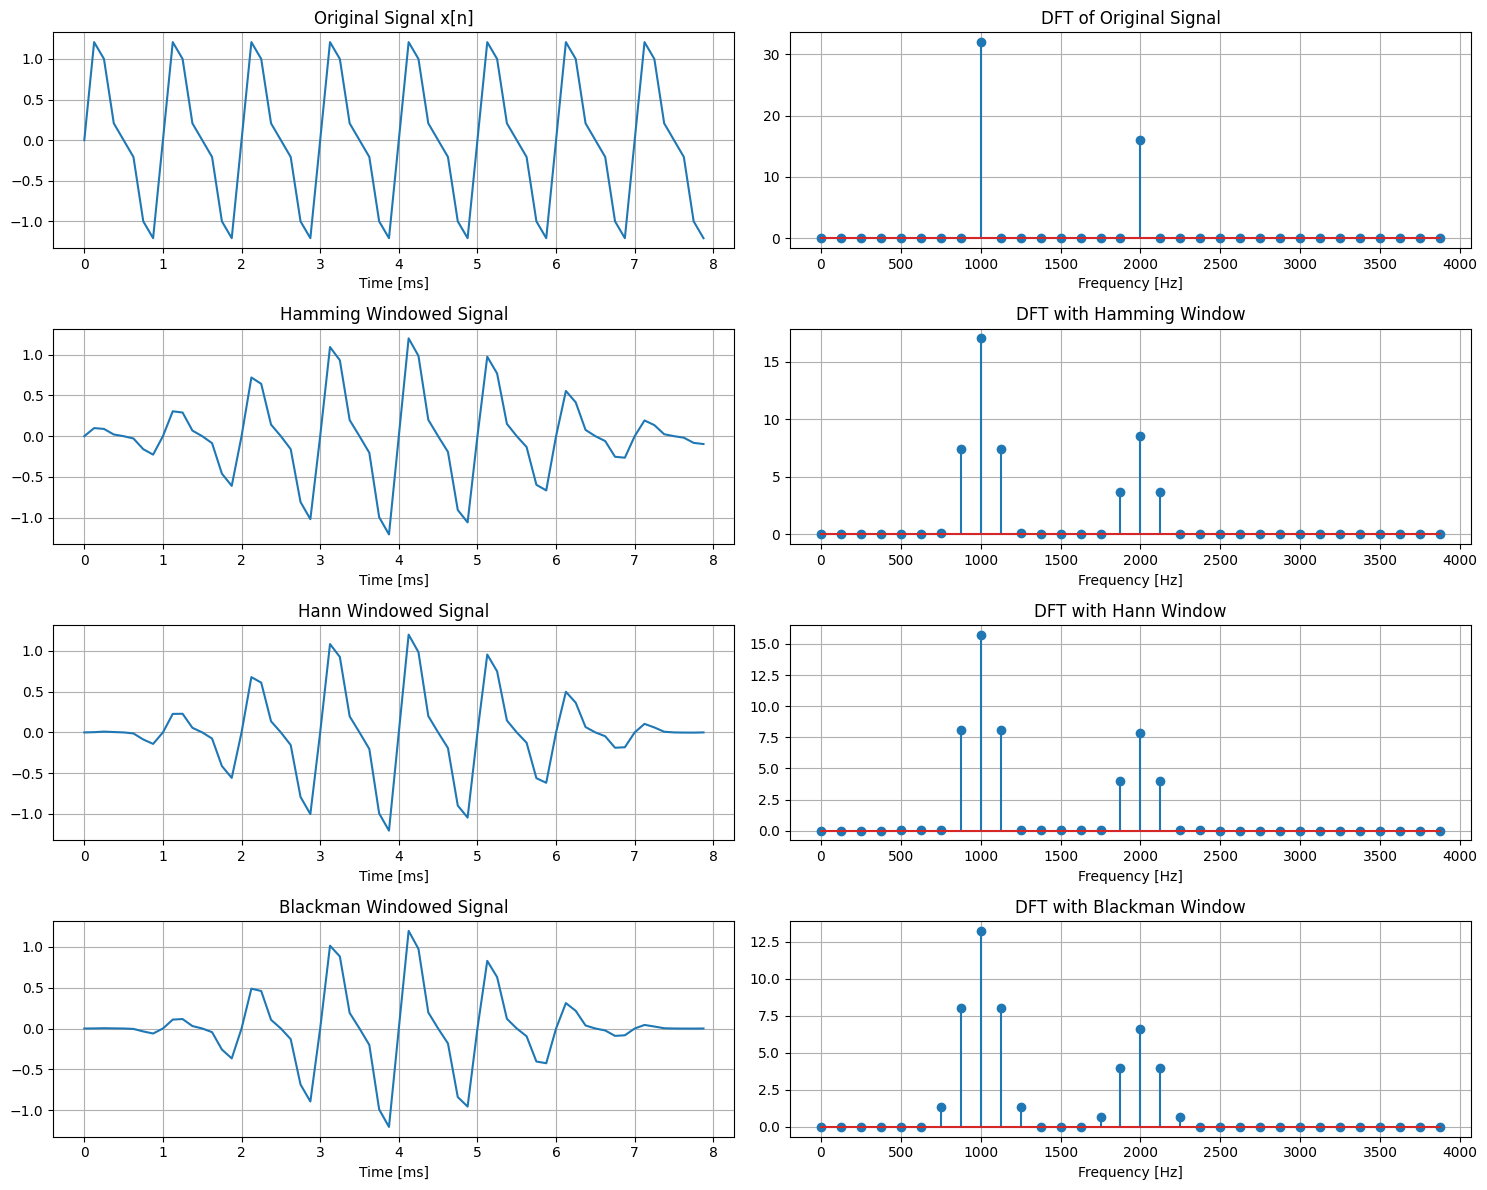

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# PARAMETERS & SAMPLING
# -------------------------------

fs = 8000          # Sampling frequency
T = 1 / fs         # Sampling period
N = 64             # Number of samples

n = np.arange(N)
t = n * T

# Original continuous-time signal sampled
x = np.sin(2 * np.pi * 1000 * t) + 0.5 * np.sin(2 * np.pi * 2000 * t)

# Frequency axis
freqs = np.fft.fftfreq(N, d=T)

# -------------------------------
# DFT of original signal
# -------------------------------
X = np.fft.fft(x)

# -------------------------------
# WINDOWS
# -------------------------------
hamming = np.hamming(N)
hann = np.hanning(N)
blackman = np.blackman(N)

# Apply each window
x_hamming = x * hamming
x_hann = x * hann
x_blackman = x * blackman

# DFT of windowed signals
X_hamming = np.fft.fft(x_hamming)
X_hann = np.fft.fft(x_hann)
X_blackman = np.fft.fft(x_blackman)

# -------------------------------
# PLOTTING
# -------------------------------
plt.figure(figsize=(15, 12))

# Original signal
plt.subplot(4, 2, 1)
plt.plot(t * 1000, x)
plt.title("Original Signal x[n]")
plt.xlabel("Time [ms]")
plt.grid()

# Original DFT
plt.subplot(4, 2, 2)
plt.stem(freqs[:N//2], np.abs(X[:N//2]))
plt.title("DFT of Original Signal")
plt.xlabel("Frequency [Hz]")
plt.grid()

# Hamming windowed signal
plt.subplot(4, 2, 3)
plt.plot(t * 1000, x_hamming)
plt.title("Hamming Windowed Signal")
plt.xlabel("Time [ms]")
plt.grid()

# DFT of Hamming windowed signal
plt.subplot(4, 2, 4)
plt.stem(freqs[:N//2], np.abs(X_hamming[:N//2]))
plt.title("DFT with Hamming Window")
plt.xlabel("Frequency [Hz]")
plt.grid()

# Hann windowed signal
plt.subplot(4, 2, 5)
plt.plot(t * 1000, x_hann)
plt.title("Hann Windowed Signal")
plt.xlabel("Time [ms]")
plt.grid()

# DFT of Hann windowed signal
plt.subplot(4, 2, 6)
plt.stem(freqs[:N//2], np.abs(X_hann[:N//2]))
plt.title("DFT with Hann Window")
plt.xlabel("Frequency [Hz]")
plt.grid()

# Blackman windowed signal
plt.subplot(4, 2, 7)
plt.plot(t * 1000, x_blackman)
plt.title("Blackman Windowed Signal")
plt.xlabel("Time [ms]")
plt.grid()

# DFT of Blackman windowed signal
plt.subplot(4, 2, 8)
plt.stem(freqs[:N//2], np.abs(X_blackman[:N//2]))
plt.title("DFT with Blackman Window")
plt.xlabel("Frequency [Hz]")
plt.grid()

plt.tight_layout()
plt.show()


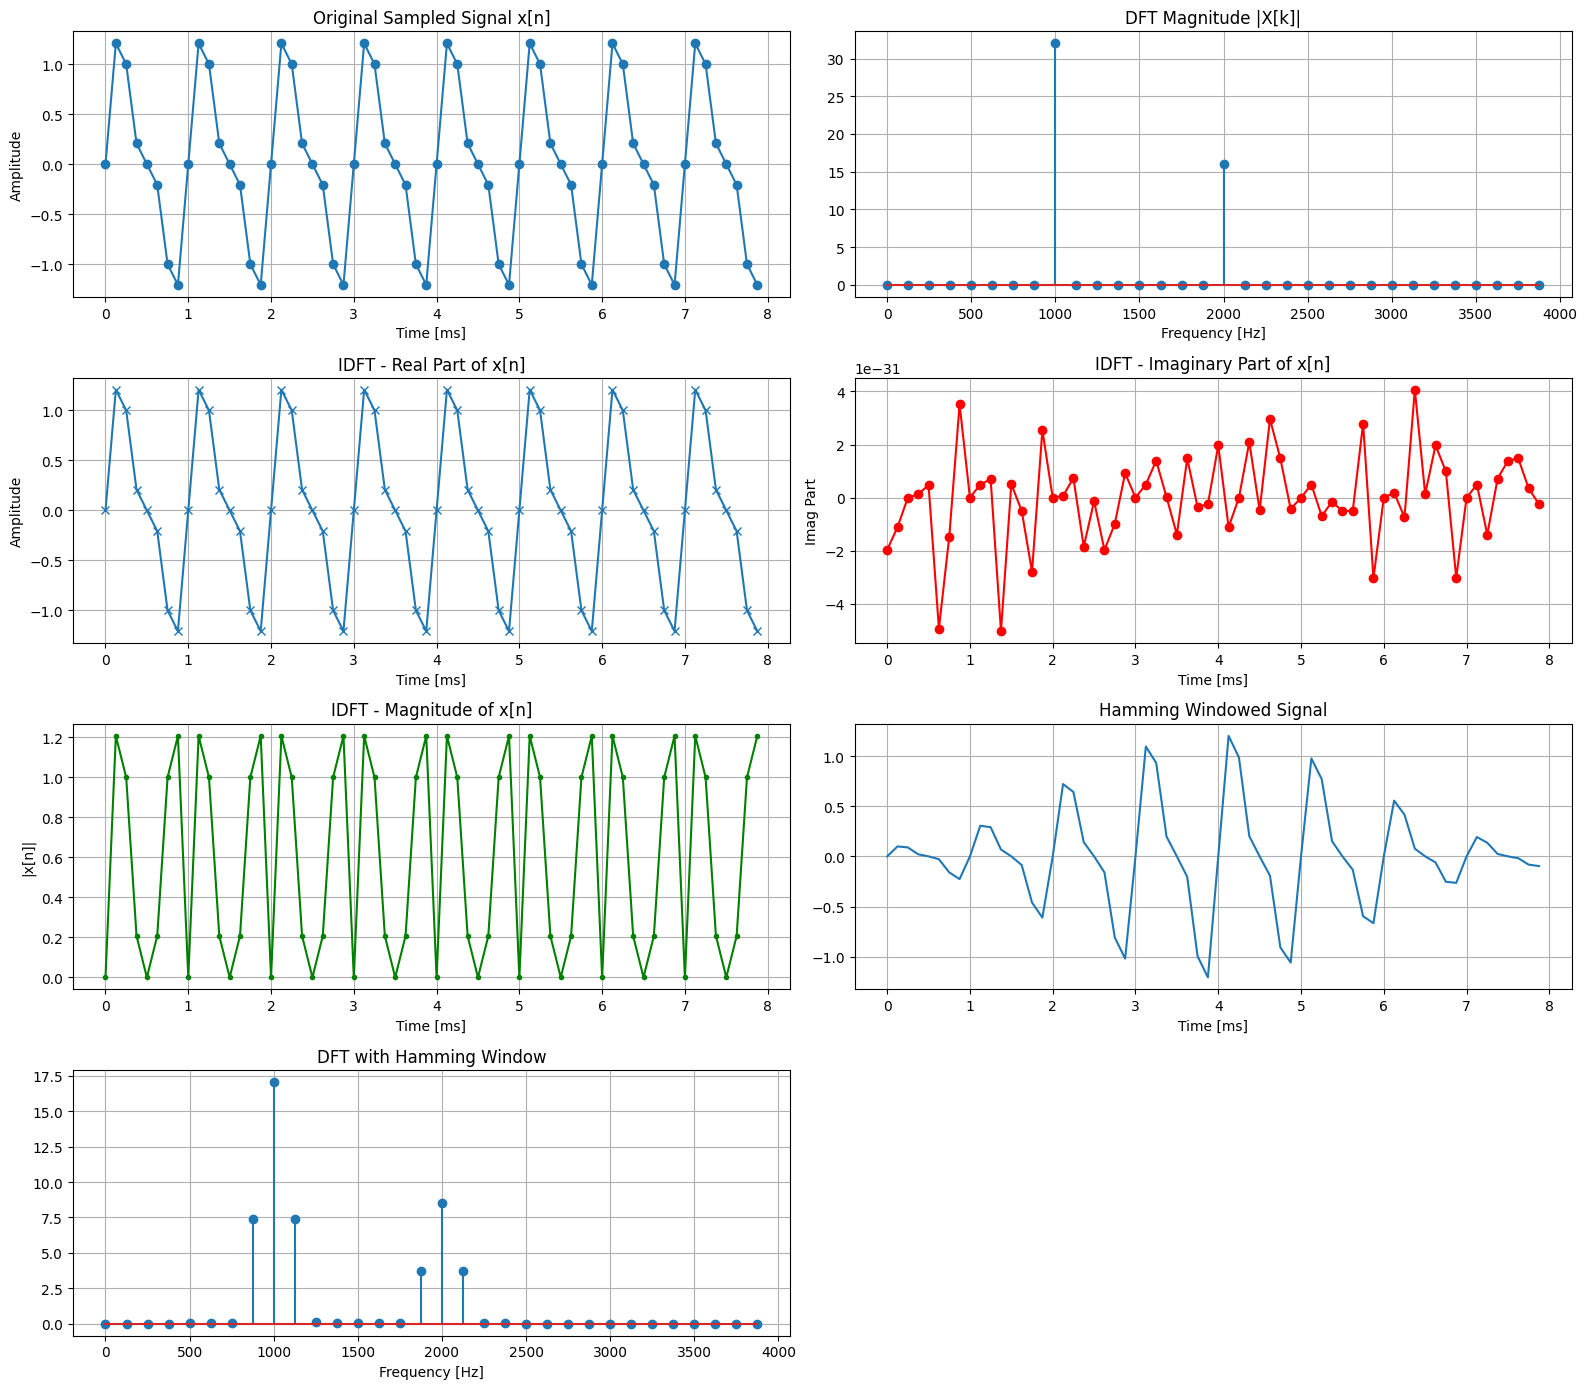

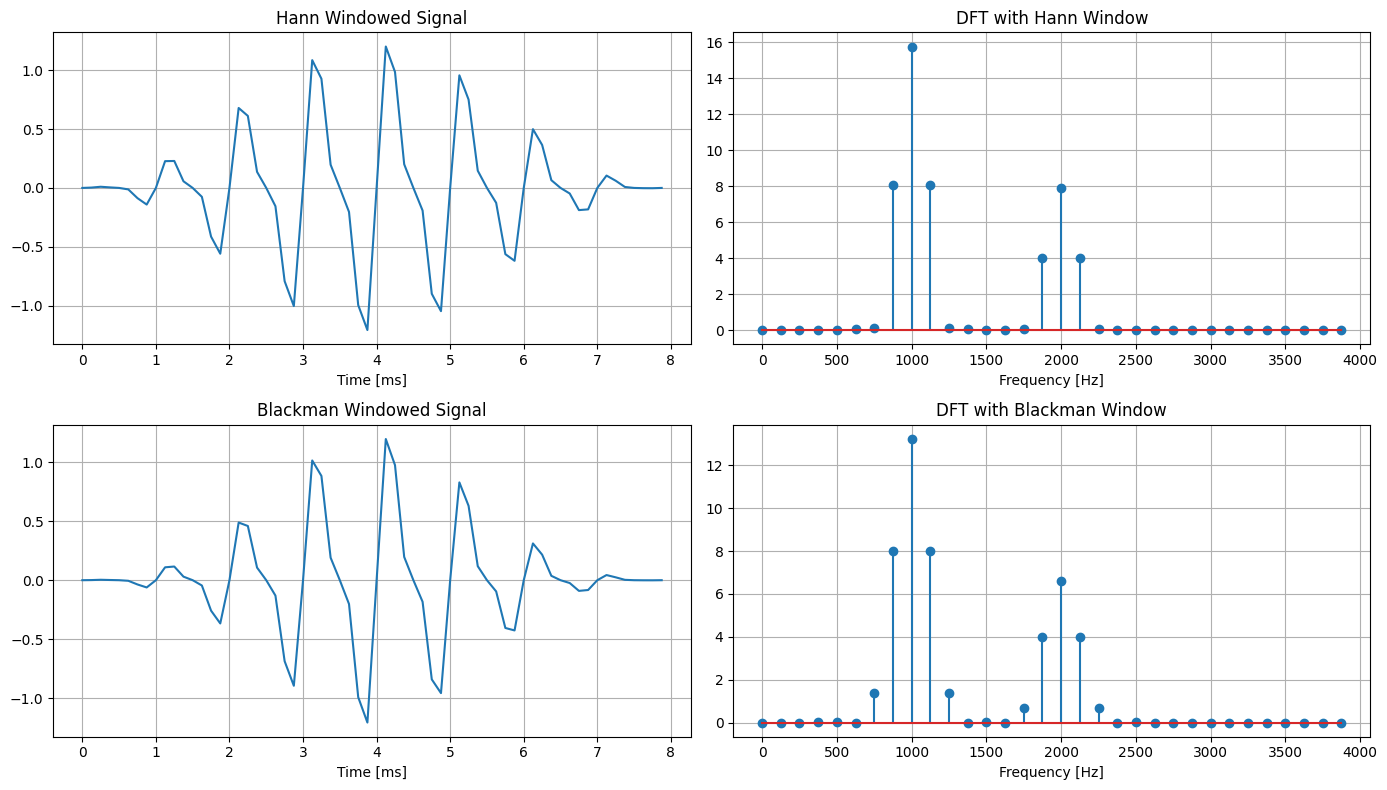

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------
# Step 1: Sampling the continuous signal
# -----------------------------------
fs = 8000            # Sampling frequency (Hz)
T = 1 / fs           # Sampling period (s)
N = 64               # Number of samples

n = np.arange(N)     # Sample indices: 0 to N-1
t = n * T            # Time vector in seconds

# Original signal: xa(t) = sin(2π·1000t) + 0.5·sin(2π·2000t + 4π)
x = np.sin(2 * np.pi * 1000 * t) + 0.5 * np.sin(2 * np.pi * 2000 * t)

# -----------------------------------
# Step 2: DFT
# -----------------------------------
X = np.fft.fft(x)
freqs = np.fft.fftfreq(N, T)  # Frequency axis in Hz

# -----------------------------------
# Step 3: IDFT (Keep complex form)
# -----------------------------------
x_idft = np.fft.ifft(X)  # Do not take .real

# -----------------------------------
# Step 4: Apply Window Functions
# -----------------------------------
hamming = np.hamming(N)
hann = np.hanning(N)
blackman = np.blackman(N)

x_hamming = x * hamming
x_hann = x * hann
x_blackman = x * blackman

# -----------------------------------
# Step 5: DFT of Windowed Signals
# -----------------------------------
X_hamming = np.fft.fft(x_hamming)
X_hann = np.fft.fft(x_hann)
X_blackman = np.fft.fft(x_blackman)

# -----------------------------------
# Step 6: Plotting
# -----------------------------------
plt.figure(figsize=(16, 14))

# Plot 1: Original Signal
plt.subplot(4, 2, 1)
plt.plot(t * 1000, x, marker='o')
plt.title("Original Sampled Signal x[n]")
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.grid()

# Plot 2: DFT of Original Signal
plt.subplot(4, 2, 2)
plt.stem(freqs[:N//2], np.abs(X[:N//2]))
plt.title("DFT Magnitude |X[k]|")
plt.xlabel("Frequency [Hz]")
plt.grid()

# Plot 3: IDFT - Real part
plt.subplot(4, 2, 3)
plt.plot(t * 1000, x_idft.real, marker='x')
plt.title("IDFT - Real Part of x[n]")
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.grid()

# Plot 4: IDFT - Imaginary part
plt.subplot(4, 2, 4)
plt.plot(t * 1000, x_idft.imag, color='r', marker='o')
plt.title("IDFT - Imaginary Part of x[n]")
plt.xlabel("Time [ms]")
plt.ylabel("Imag Part")
plt.grid()

# Plot 5: IDFT - Magnitude
plt.subplot(4, 2, 5)
plt.plot(t * 1000, np.abs(x_idft), color='g', marker='.')
plt.title("IDFT - Magnitude of x[n]")
plt.xlabel("Time [ms]")
plt.ylabel("|x[n]|")
plt.grid()

# Plot 6: Hamming Windowed Signal
plt.subplot(4, 2, 6)
plt.plot(t * 1000, x_hamming)
plt.title("Hamming Windowed Signal")
plt.xlabel("Time [ms]")
plt.grid()

# Plot 7: DFT of Hamming Windowed Signal
plt.subplot(4, 2, 7)
plt.stem(freqs[:N//2], np.abs(X_hamming[:N//2]))
plt.title("DFT with Hamming Window")
plt.xlabel("Frequency [Hz]")
plt.grid()

plt.tight_layout()
plt.show()

# -------------- Second Figure for Hann & Blackman -----------------

plt.figure(figsize=(14, 8))

# Hann Window
plt.subplot(2, 2, 1)
plt.plot(t * 1000, x_hann)
plt.title("Hann Windowed Signal")
plt.xlabel("Time [ms]")
plt.grid()

plt.subplot(2, 2, 2)
plt.stem(freqs[:N//2], np.abs(X_hann[:N//2]))
plt.title("DFT with Hann Window")
plt.xlabel("Frequency [Hz]")
plt.grid()

# Blackman Window
plt.subplot(2, 2, 3)
plt.plot(t * 1000, x_blackman)
plt.title("Blackman Windowed Signal")
plt.xlabel("Time [ms]")
plt.grid()

plt.subplot(2, 2, 4)
plt.stem(freqs[:N//2], np.abs(X_blackman[:N//2]))
plt.title("DFT with Blackman Window")
plt.xlabel("Frequency [Hz]")
plt.grid()

plt.tight_layout()
plt.show()


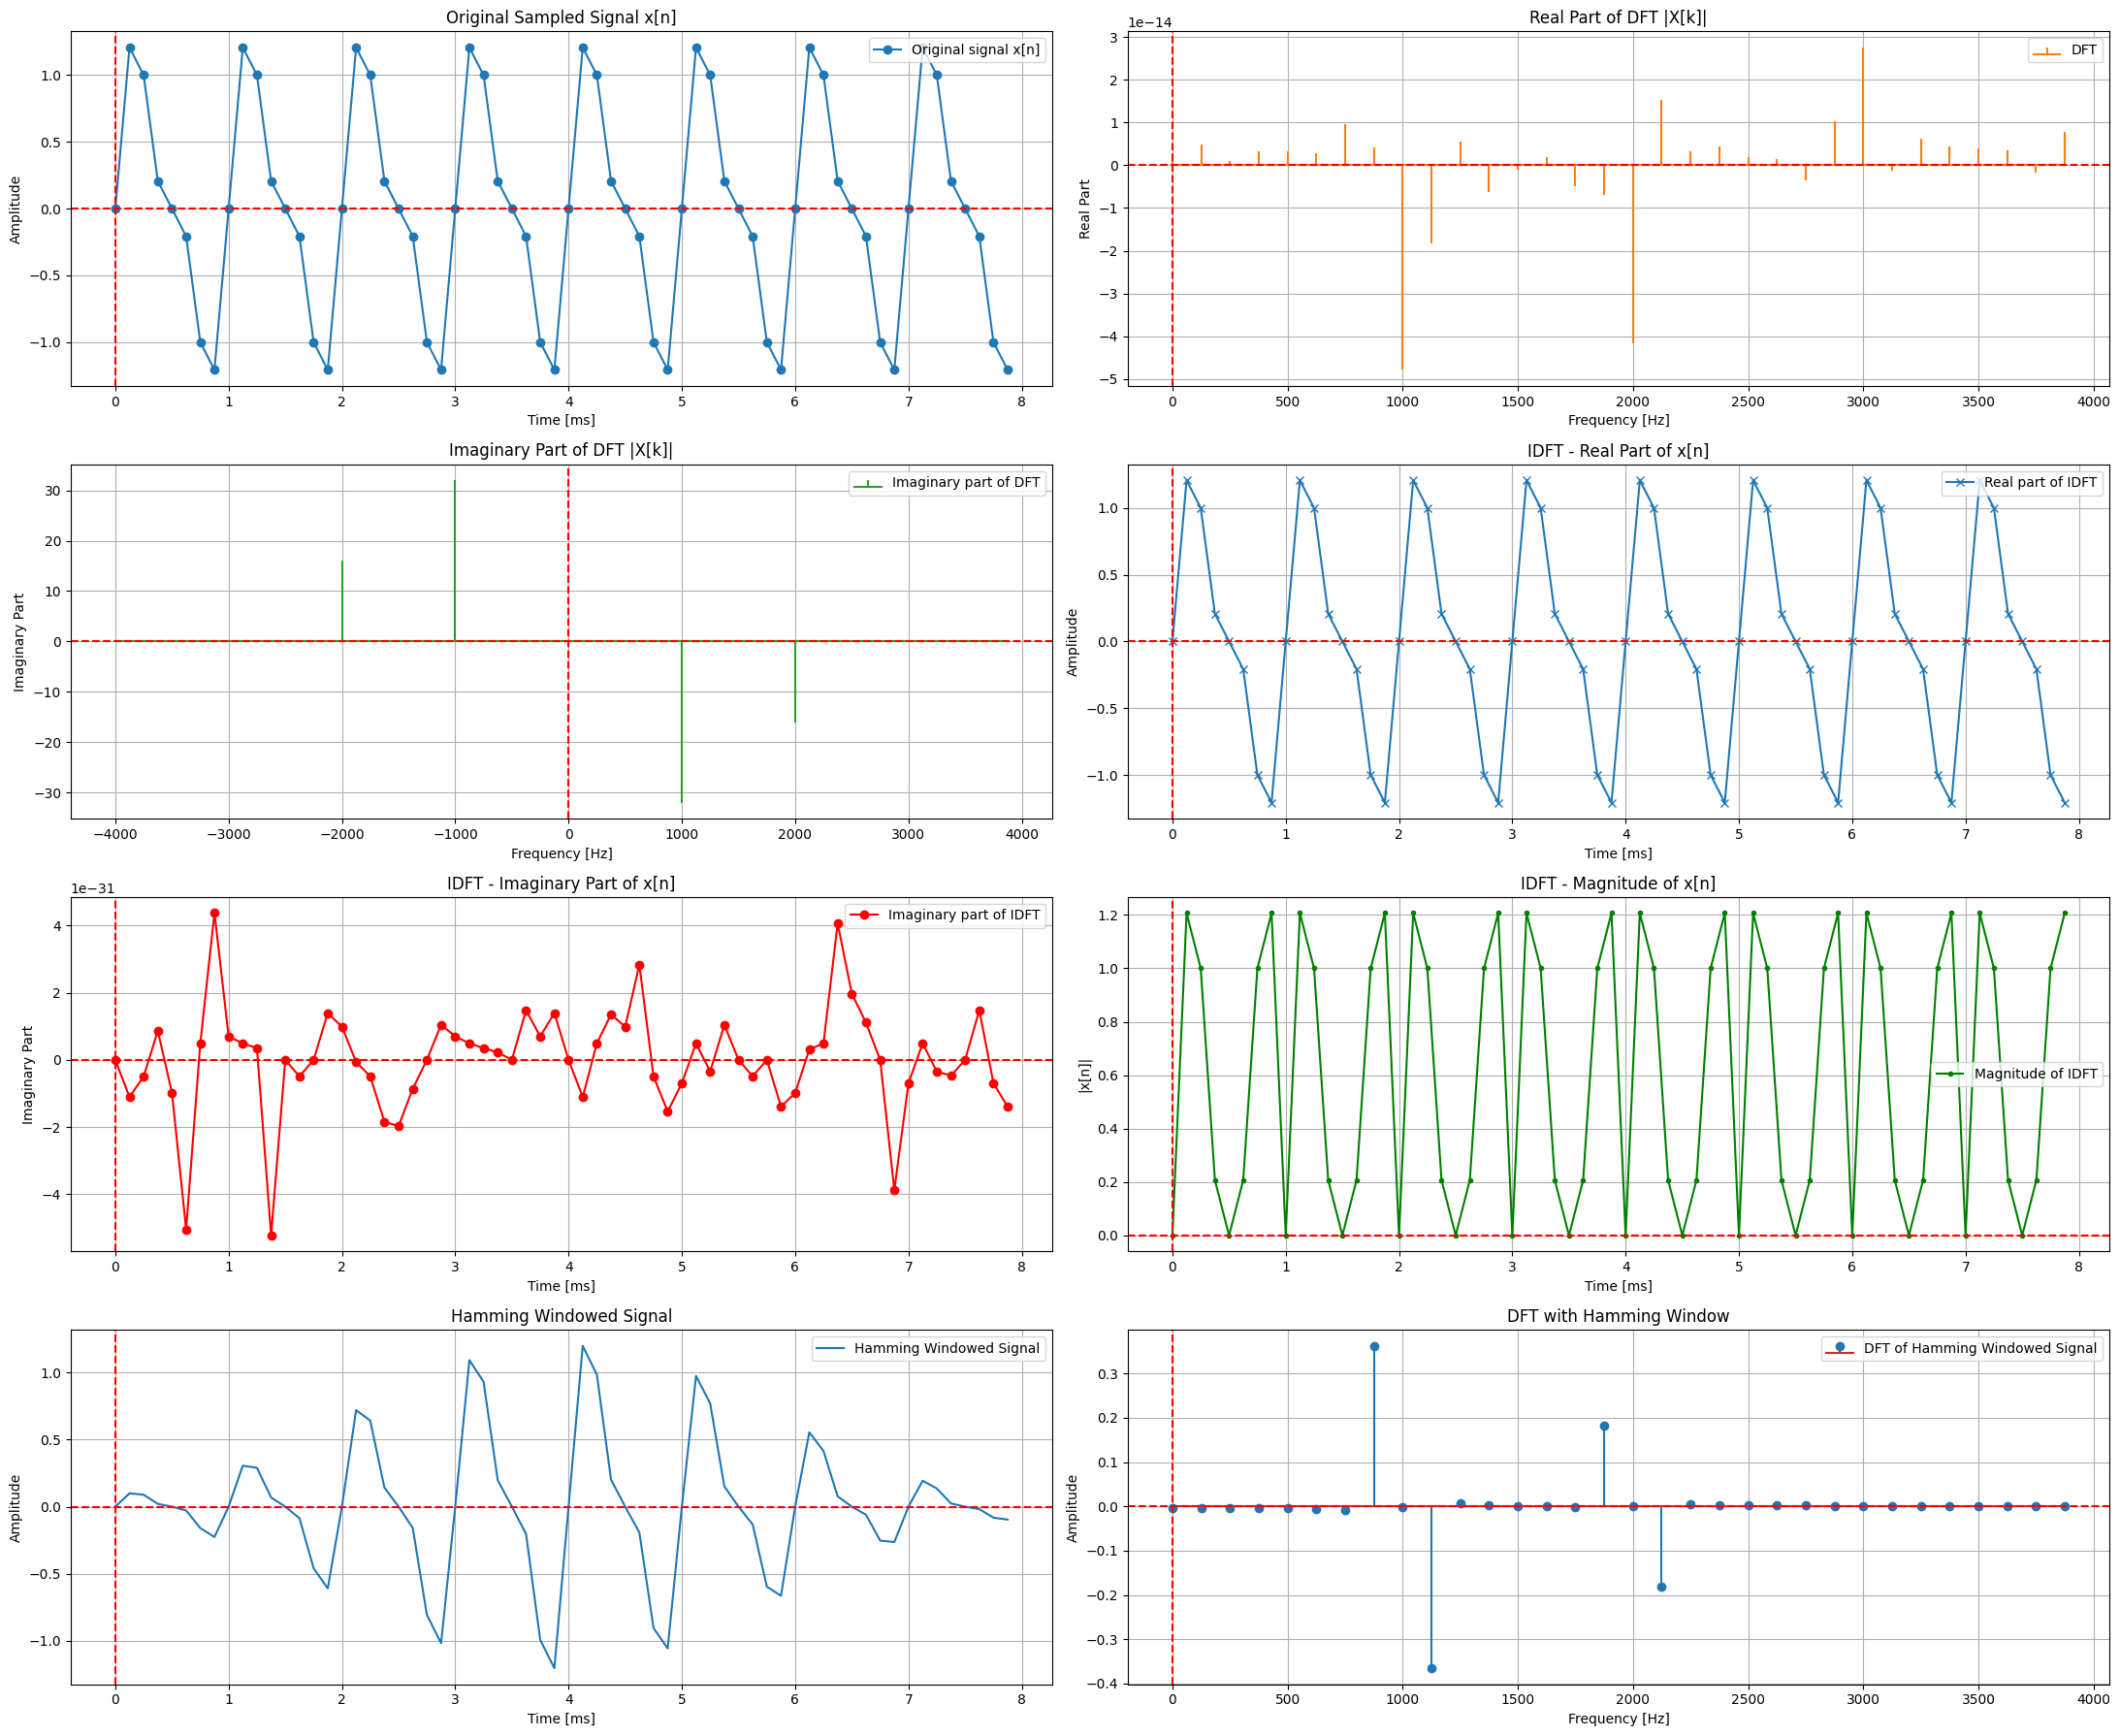

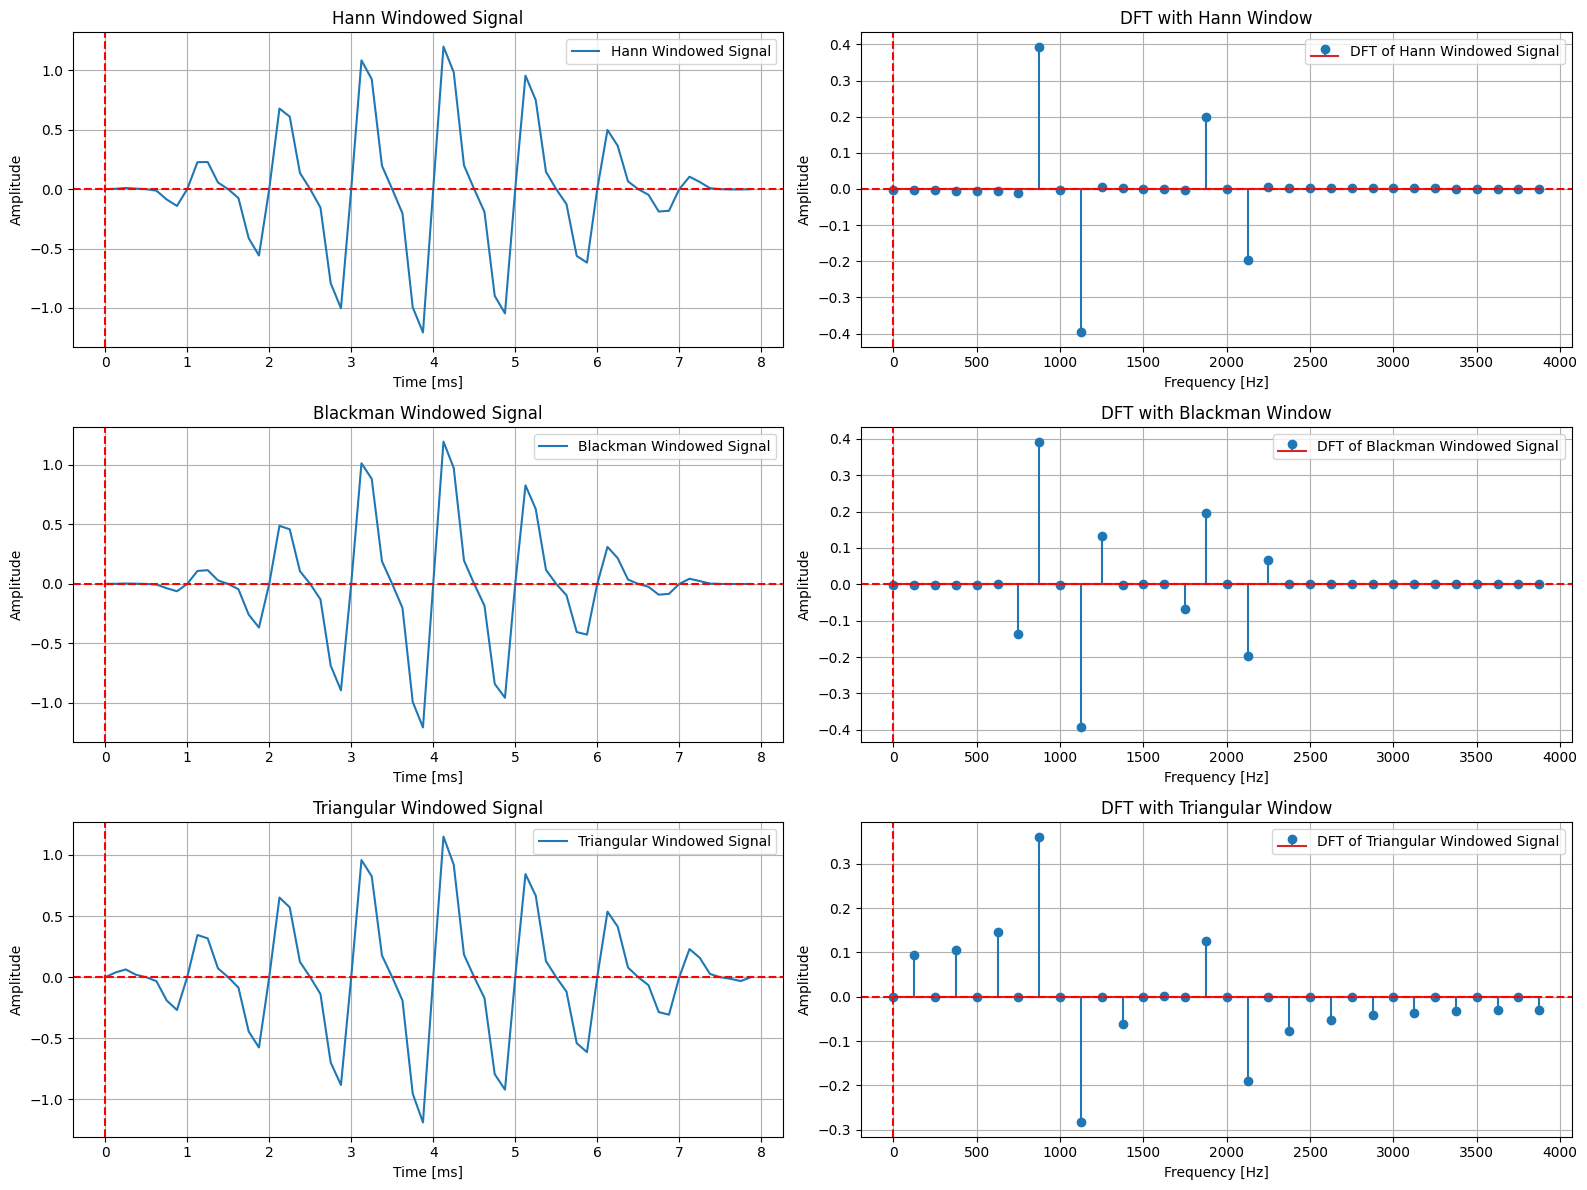

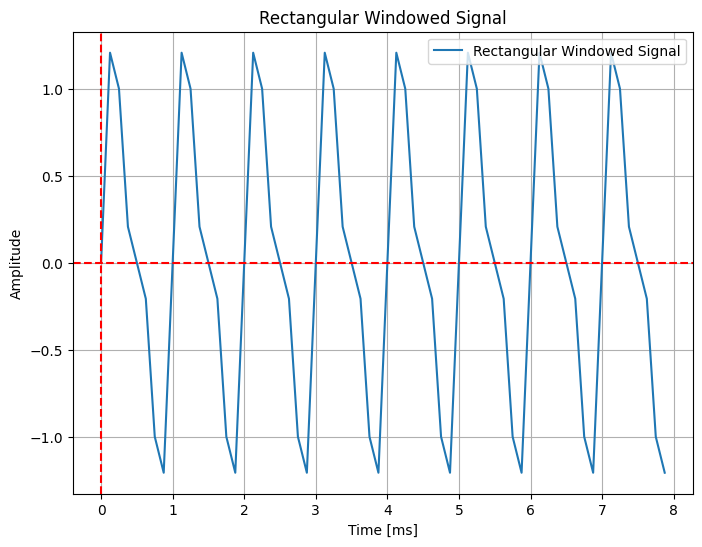

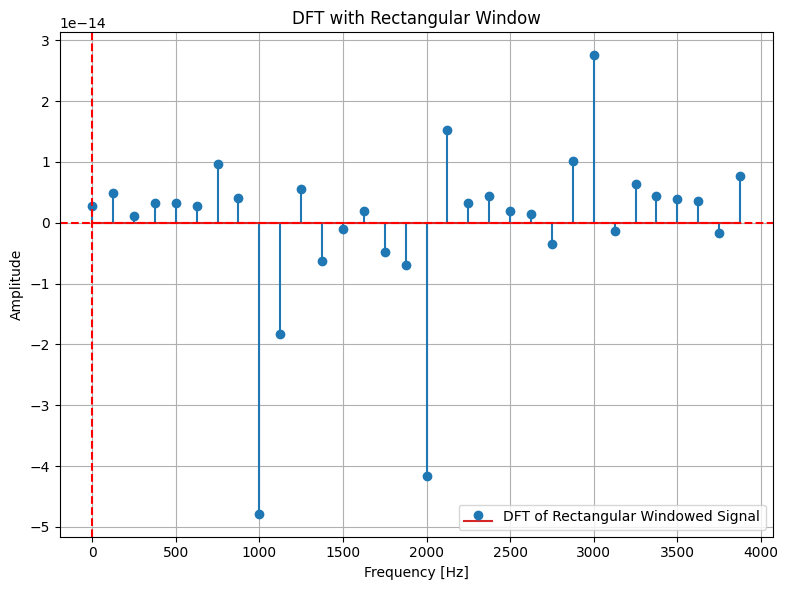

In [28]:
import numpy as np 
import matplotlib.pyplot as plt 




N = 64
f = 8000 # Sampling frequency
T = 1/f  # Sampling period
n = np.arange(N)  # Sample indices
t = n * T  # Time vector


x = np.sin(2*np.pi*1000*t) + 0.5*np.sin(2*np.pi*2000*t + 4*np.pi)

X = np.fft.fft(x) #DFT of the original signal
freq = np.fft.fftfreq(N,T)  # Frequency axis in Hz

idft_x = np.fft.ifft(X)  # IDFT of the signal (keep complex form)


hamming_x = np.hamming(N)*x  # Hamming window
hann_x = np.hanning(N)*x  # Hann window
blackman_x = np.blackman(N)*x  # Black

triangular_x = np.bartlett(N)*x  # Triangular window
rectangle_x = np.ones(N)*x # Rectangular window

# DFT of windowed signals
X_hamming = np.fft.fft(hamming_x)
X_hann = np.fft.fft(hann_x)
X_blackman = np.fft.fft(blackman_x)
X_triangular = np.fft.fft(triangular_x)
X_rectangle = np.fft.fft(rectangle_x)



plt.figure(figsize=(22,18))

# Plot 1: Original Signal
plt.subplot(4, 2, 1)
plt.plot(t*1000,x, marker='o',label='Original signal x[n]')
plt.title("Original Sampled Signal x[n]")
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.axhline(0,color='red', linestyle='--')
plt.axvline(0,color='red', linestyle='--')
plt.legend()
plt.grid()

# Plot 2: Real part of DFT
plt.subplot(4, 2, 2)
plt.stem(freq[:N//2],X.real[:N//2],label='DFT',linefmt='C1o-', markerfmt=' ', basefmt='C1-')
plt.title("Real Part of DFT |X[k]|")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Real Part")
plt.axhline(0,color='red', linestyle='--')
plt.axvline(0,color='red', linestyle='--')
plt.legend()
plt.grid()

#plot 3: Imaginary part of DFT
plt.subplot(4, 2, 3)
plt.stem(freq,X.imag,label='Imaginary part of DFT',linefmt='C2o-', markerfmt=' ', basefmt='C2-')
plt.title("Imaginary Part of DFT |X[k]|")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Imaginary Part")
plt.axhline(0,color='red', linestyle='--')
plt.axvline(0,color='red', linestyle='--')
plt.legend()
plt.grid()

# Plot 4: IDFT - Real part
plt.subplot(4, 2, 4)
plt.plot(t*1000, idft_x.real, marker='x', label='Real part of IDFT')
plt.title("IDFT - Real Part of x[n]")
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.axhline(0,color='red', linestyle='--')
plt.axvline(0,color='red', linestyle='--')
plt.legend()
plt.grid()

# Plot 5: IDFT - Imaginary part
plt.subplot(4, 2, 5)
plt.plot(t*1000, idft_x.imag, color='r', marker='o', label='Imaginary part of IDFT')
plt.title("IDFT - Imaginary Part of x[n]")
plt.xlabel("Time [ms]")
plt.ylabel("Imaginary Part")
plt.axhline(0,color='red', linestyle='--')
plt.axvline(0,color='red', linestyle='--')
plt.legend()
plt.grid()

# Plot 6: IDFT - Magnitude
plt.subplot(4, 2, 6)
plt.plot(t*1000, np.abs(idft_x), color='g', marker='.', label='Magnitude of IDFT')
plt.title("IDFT - Magnitude of x[n]")
plt.xlabel("Time [ms]")
plt.ylabel("|x[n]|")
plt.axhline(0,color='red', linestyle='--')
plt.axvline(0,color='red', linestyle='--')
plt.legend()
plt.grid()

# Plot 7: Hamming Windowed Signal
plt.subplot(4, 2, 7)
plt.plot(t*1000, hamming_x, label='Hamming Windowed Signal')
plt.title("Hamming Windowed Signal")
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.axhline(0,color='red', linestyle='--')
plt.axvline(0,color='red', linestyle='--')
plt.legend()
plt.grid()

# Plot 8: DFT of Hamming Windowed Signal
plt.subplot(4, 2, 8)
plt.stem(freq[:N//2], X_hamming.real[:N//2], label='DFT of Hamming Windowed Signal')
plt.title("DFT with Hamming Window")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.axhline(0,color='red', linestyle='--')
plt.axvline(0,color='red', linestyle='--')
plt.legend()
plt.grid()





plt.tight_layout()
plt.show()
# -------------- Second Figure for Hann, Blackman, Triangular & Rectangular -----------------
plt.figure(figsize=(16, 12))
# Plot 1: Hann Windowed Signal
plt.subplot(3, 2, 1)
plt.plot(t * 1000, hann_x, label='Hann Windowed Signal')
plt.title("Hann Windowed Signal")
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='red', linestyle='--')
plt.legend()
plt.grid()

# Plot 2: DFT of Hann Windowed Signal
plt.subplot(3, 2, 2)
plt.stem(freq[:N//2], X_hann.real[:N//2], label='DFT of Hann Windowed Signal')
plt.title("DFT with Hann Window")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='red', linestyle='--')
plt.legend()
plt.grid()

# Plot 3: Blackman Windowed Signal
plt.subplot(3, 2, 3)
plt.plot(t * 1000, blackman_x, label='Blackman Windowed Signal')    
plt.title("Blackman Windowed Signal")
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='red', linestyle='--')
plt.legend()
plt.grid()

# Plot 4: DFT of Blackman Windowed Signal
plt.subplot(3, 2, 4)
plt.stem(freq[:N//2], X_blackman.real[:N//2], label='DFT of Blackman Windowed Signal')
plt.title("DFT with Blackman Window")   
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='red', linestyle='--')
plt.legend()
plt.grid()
# Plot 5: Triangular Windowed Signal
plt.subplot(3, 2, 5)
plt.plot(t * 1000, triangular_x, label='Triangular Windowed Signal')
plt.title("Triangular Windowed Signal")
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='red', linestyle='--')
plt.legend()
plt.grid()
# Plot 6: DFT of Triangular Windowed Signal
plt.subplot(3, 2, 6)
plt.stem(freq[:N//2], X_triangular.real[:N//2], label='DFT of Triangular Windowed Signal')
plt.title("DFT with Triangular Window")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='red', linestyle='--')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
# -------------- Rectangular Window -----------------
plt.figure(figsize=(8, 6))
# Plot Rectangular Windowed Signal
plt.plot(t * 1000, rectangle_x, label='Rectangular Windowed Signal')
plt.title("Rectangular Windowed Signal")
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='red', linestyle='--')
plt.legend()
plt.grid()
# Plot DFT of Rectangular Windowed Signal
plt.figure(figsize=(8, 6))
plt.stem(freq[:N//2], X_rectangle.real[:N//2], label='DFT of Rectangular Windowed Signal')
plt.title("DFT with Rectangular Window")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='red', linestyle='--')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
# -------------- End of Rectangular Window -----------------






C:\Users\mahfu\AppData\Roaming\Python\Python313\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\mahfu\AppData\Roaming\Python\Python313\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


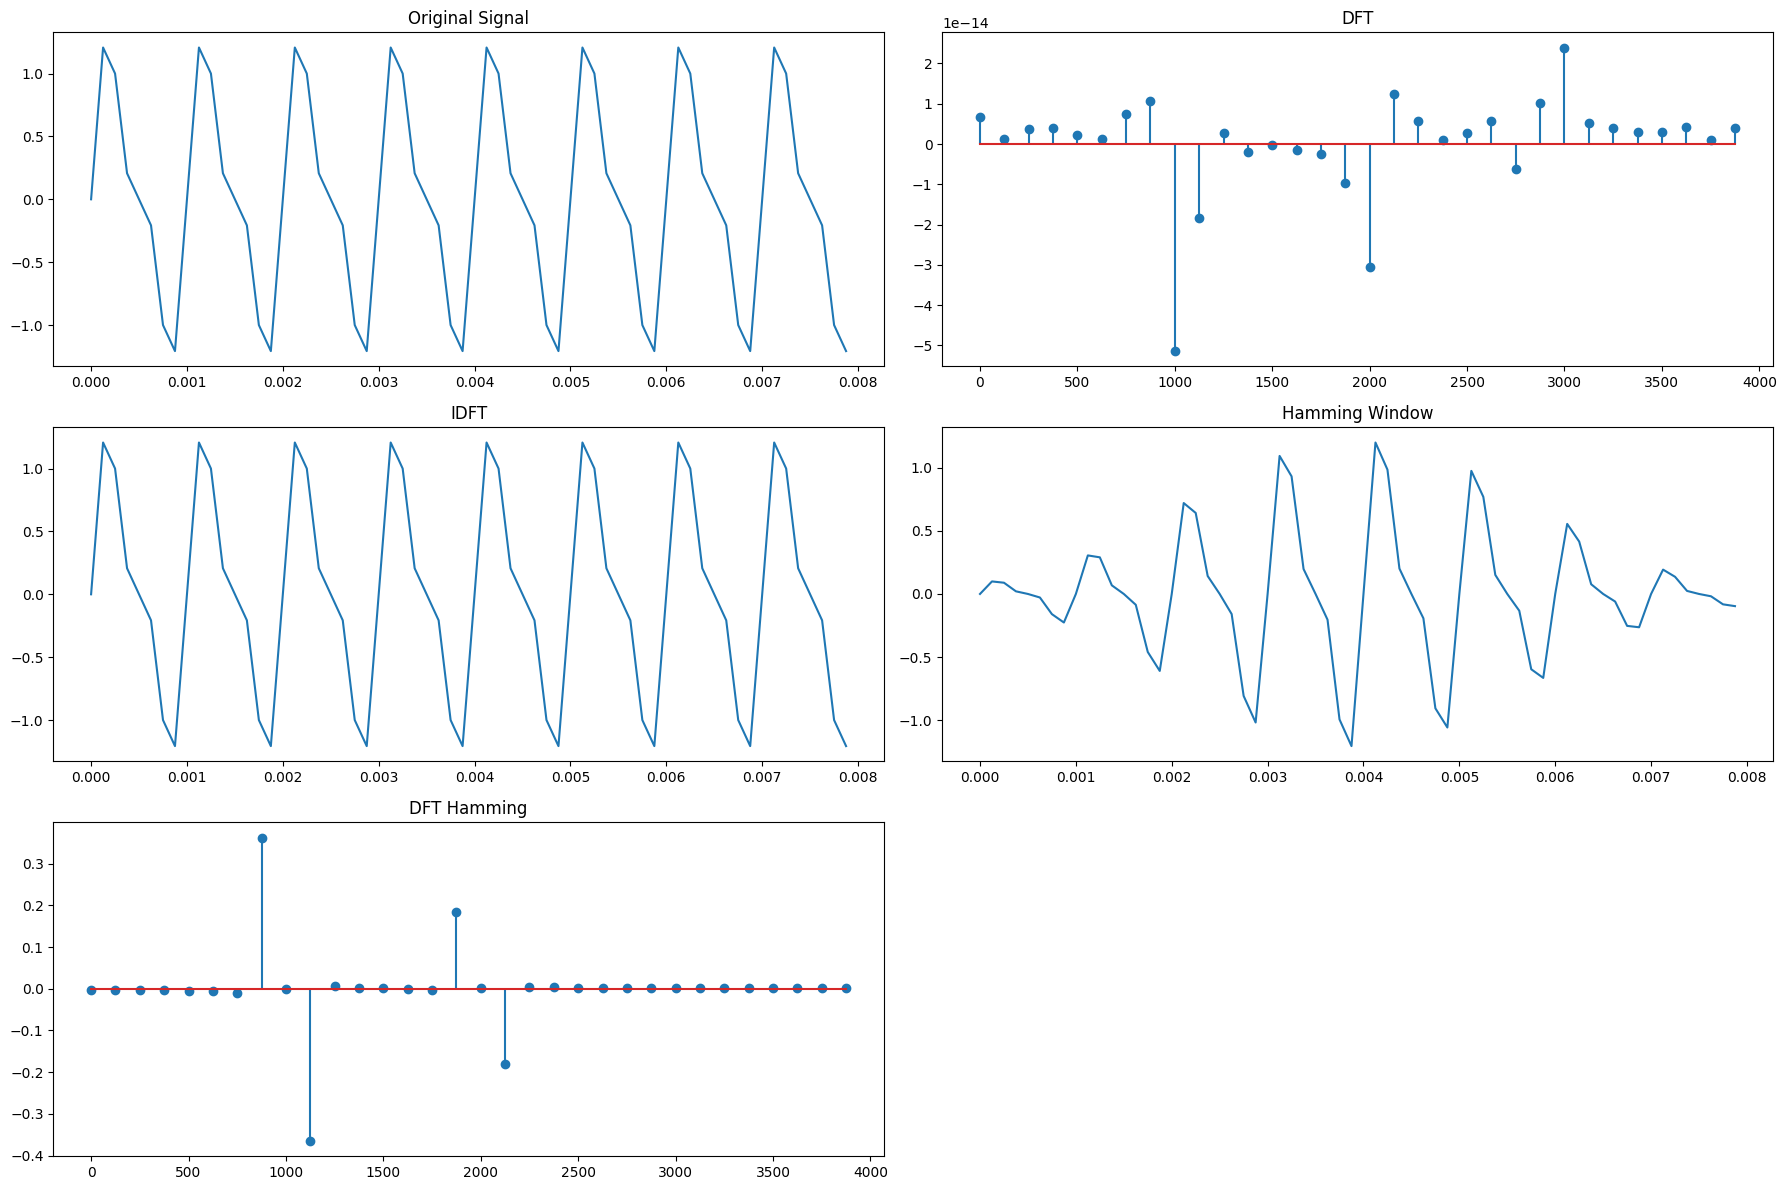

In [1]:
import matplotlib.pyplot as plt
import numpy as np 

fs = 8000
N= 64
n= np.arange(N)
T = 1/fs
t = n*T
#xa(t)=sin(2π⋅1000t)+0.5sin(2π⋅2000t+4π). 
x = np.sin(2*np.pi*1000*t) + 0.5 * np.sin(2*np.pi*2000*t)

X_dft = np.fft.fft(x)
freq = np.fft.fftfreq(N,T)

x_idft = np.fft.ifft(X_dft)

hamming = np.hamming(N)
x_hamming = x * hamming

dft_hamming = np.fft.fft(x_hamming)




plt.figure(figsize=(18,12))

plt.subplot(3,2,1)
plt.plot(t,x)
plt.title("Original Signal")

plt.subplot(3,2,2)
plt.stem(freq[:N//2],X_dft.real[:N//2])
plt.title("DFT")

plt.subplot(3,2,3)
plt.plot(t,x_idft)
plt.title("IDFT")

plt.subplot(3,2,4)
plt.plot(t,x_hamming)
plt.title("Hamming Window")

plt.subplot(3,2,5)
plt.stem(freq[:N//2],dft_hamming.real[:N//2])
plt.title("DFT Hamming")

plt.tight_layout()
plt.show()